# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | afaahiti
Processing Record 4 of Set 1 | taoudenni
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | sokoni
Processing Record 7 of Set 1 | morondava
Processing Record 8 of Set 1 | ad dilam
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | nova sintra
Processing Record 11 of Set 1 | yuzhno-kurilsk
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | dhidhdhoo
Processing Record 15 of Set 1 | doctor mora
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | tarko-sale
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | bilibino
Processing Record 

Processing Record 38 of Set 4 | al burayqah
Processing Record 39 of Set 4 | talnakh
Processing Record 40 of Set 4 | motilla del palancar
Processing Record 41 of Set 4 | lancaster
Processing Record 42 of Set 4 | dwarka
Processing Record 43 of Set 4 | alofi
Processing Record 44 of Set 4 | mount pearl
Processing Record 45 of Set 4 | saint-paul
Processing Record 46 of Set 4 | labrador city
Processing Record 47 of Set 4 | roscommon
Processing Record 48 of Set 4 | baruun-urt
Processing Record 49 of Set 4 | santo antonio do leverger
Processing Record 0 of Set 5 | sigli
Processing Record 1 of Set 5 | badger
Processing Record 2 of Set 5 | poplar bluff
Processing Record 3 of Set 5 | lienz
Processing Record 4 of Set 5 | castillos
Processing Record 5 of Set 5 | shingu
Processing Record 6 of Set 5 | lata
Processing Record 7 of Set 5 | mermoz boabab
Processing Record 8 of Set 5 | happy valley-goose bay
Processing Record 9 of Set 5 | arraial do cabo
Processing Record 10 of Set 5 | kingston
Processing

Processing Record 29 of Set 8 | nar'yan-mar
Processing Record 30 of Set 8 | cuito
Processing Record 31 of Set 8 | dryden
Processing Record 32 of Set 8 | mauganj
Processing Record 33 of Set 8 | pekan
Processing Record 34 of Set 8 | saint-pierre
Processing Record 35 of Set 8 | glenwood springs
Processing Record 36 of Set 8 | veneux-les-sablons
Processing Record 37 of Set 8 | flying fish cove
Processing Record 38 of Set 8 | guadalajara
Processing Record 39 of Set 8 | selkirk
Processing Record 40 of Set 8 | thunder bay
Processing Record 41 of Set 8 | rio grande
Processing Record 42 of Set 8 | cabras
Processing Record 43 of Set 8 | sosnogorsk
Processing Record 44 of Set 8 | masons bay
City not found. Skipping...
Processing Record 45 of Set 8 | dzhambeyty
Processing Record 46 of Set 8 | barra de santo antonio
Processing Record 47 of Set 8 | gadzhiyevo
Processing Record 48 of Set 8 | naze
Processing Record 49 of Set 8 | belyy yar
Processing Record 0 of Set 9 | shizuishan
Processing Record 1 o

Processing Record 21 of Set 12 | sinjai
Processing Record 22 of Set 12 | altai
Processing Record 23 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 24 of Set 12 | eydhafushi
Processing Record 25 of Set 12 | bakchar
Processing Record 26 of Set 12 | christchurch
Processing Record 27 of Set 12 | zvishavane
Processing Record 28 of Set 12 | westport
Processing Record 29 of Set 12 | barra do bugres
Processing Record 30 of Set 12 | guerrero negro
Processing Record 31 of Set 12 | princeville
Processing Record 32 of Set 12 | isetskoye
Processing Record 33 of Set 12 | ketchikan
Processing Record 34 of Set 12 | kincardine
Processing Record 35 of Set 12 | loacan
Processing Record 36 of Set 12 | anadarko
Processing Record 37 of Set 12 | ceres
Processing Record 38 of Set 12 | solvang
Processing Record 39 of Set 12 | makhambet
Processing Record 40 of Set 12 | diapaga
Processing Record 41 of Set 12 | chiquinquira
Processing Record 42 of Set 12 | suez
Processing Record 43 of Set 12

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,289.44,88,75,3.60,CA,1688557479
1,adamstown,-25.0660,-130.1015,294.18,70,90,3.77,PN,1688557484
2,afaahiti,-17.7500,-149.2833,296.08,70,42,7.54,PF,1688557551
3,taoudenni,22.6783,-3.9836,319.95,8,1,2.18,ML,1688557650
4,iqaluit,63.7506,-68.5145,278.00,86,75,1.03,CA,1688557500


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,289.44,88,75,3.60,CA,1688557479
1,adamstown,-25.0660,-130.1015,294.18,70,90,3.77,PN,1688557484
2,afaahiti,-17.7500,-149.2833,296.08,70,42,7.54,PF,1688557551
3,taoudenni,22.6783,-3.9836,319.95,8,1,2.18,ML,1688557650
4,iqaluit,63.7506,-68.5145,278.00,86,75,1.03,CA,1688557500


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

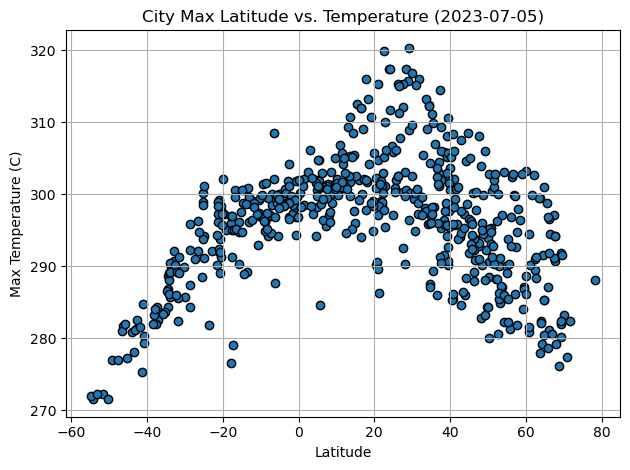

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolor="black",linewidth=1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Get the current date
current_date = time.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature ({current_date})')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

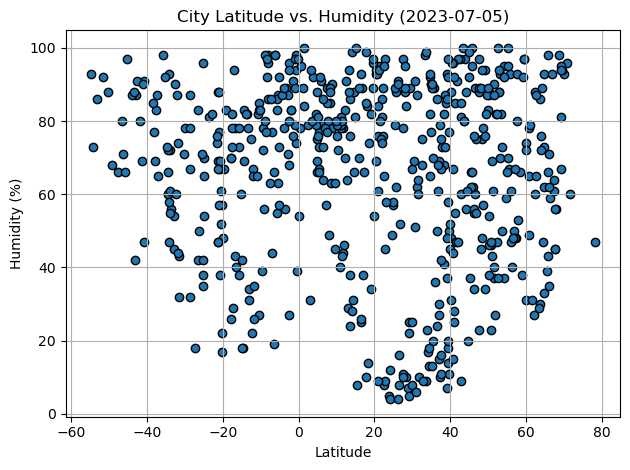

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, edgecolor="black",linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

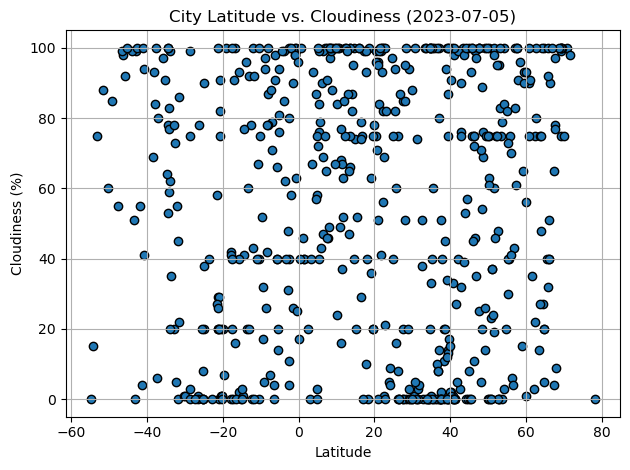

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolor="black",linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

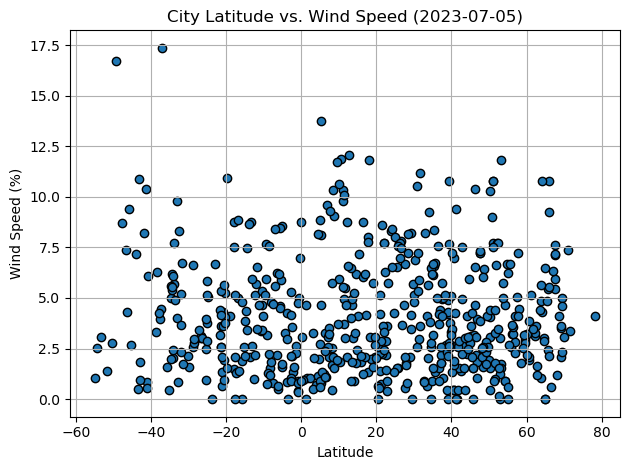

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolor="black",linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,289.44,88,75,3.60,CA,1688557479
3,taoudenni,22.6783,-3.9836,319.95,8,1,2.18,ML,1688557650
4,iqaluit,63.7506,-68.5145,278.00,86,75,1.03,CA,1688557500
7,ad dilam,23.9915,47.1627,317.38,5,5,8.33,SA,1688558026
8,olonkinbyen,70.9221,-8.7187,277.34,96,100,7.37,SJ,1688557516


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,294.18,70,90,3.77,PN,1688557484
2,afaahiti,-17.7500,-149.2833,296.08,70,42,7.54,PF,1688557551
5,sokoni,-6.4333,39.5500,302.07,66,4,6.25,TZ,1688558026
6,morondava,-20.2833,44.2833,297.57,57,1,5.24,MG,1688558026
11,puerto ayora,-0.7393,-90.3518,296.79,94,99,0.89,EC,1688557506


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.2909765289017737


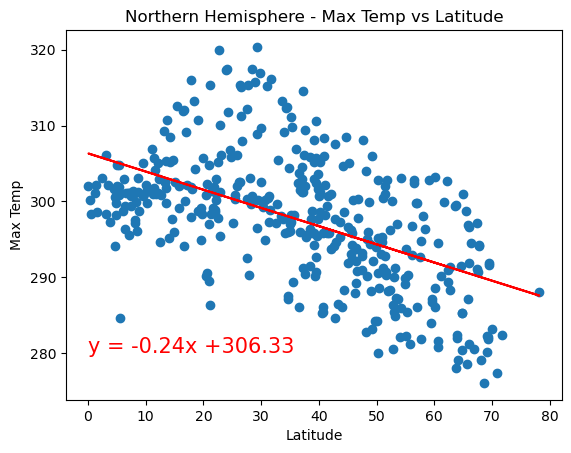

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0, 280),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.7136589384406843


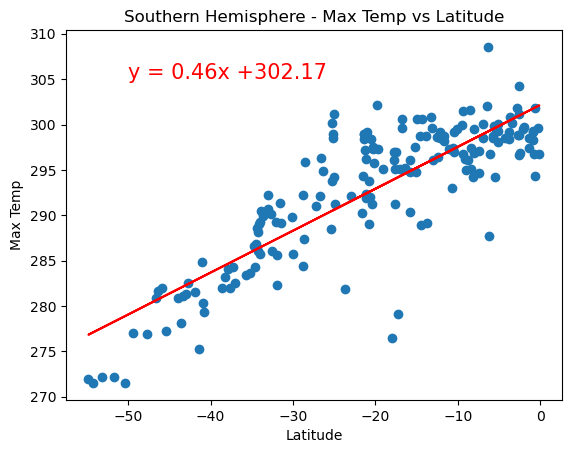

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,305),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere shows a negative correlation between Max Temp and Latitude, whilst the Southern Hemisphere shows a positive correlation. Based on the two data sets, it is apparent that the r-value is higher for the Southern Hemisphere, indicating the Southern Hemisphere regression line is a better representation of the relationship between Max Temp and Latitude, than the Northern Hemisphere regression line.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0017289573901394819


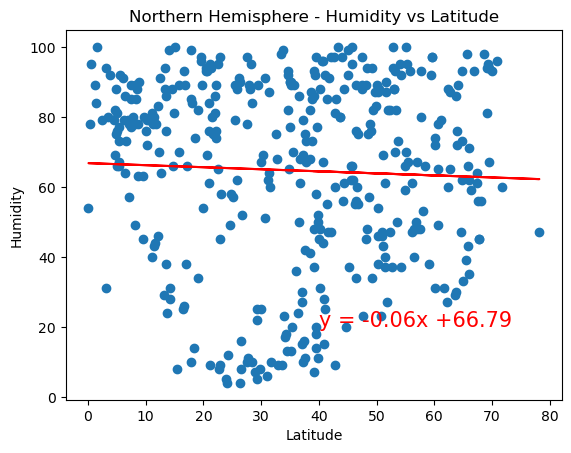

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40, 20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.00010273276565963937


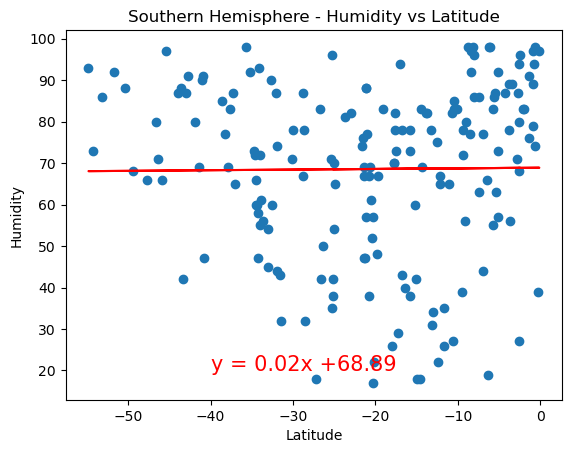

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-40, 20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere shows a slightly negative correlation between Humidity and Latitude, whilst the Southern Hemisphere shows a slightly positive correlation. Both data sets show a very small r-value, indicating that both regression lines poorly represent the relationship between Humidity and Latitude for their respective hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0032231198886262568


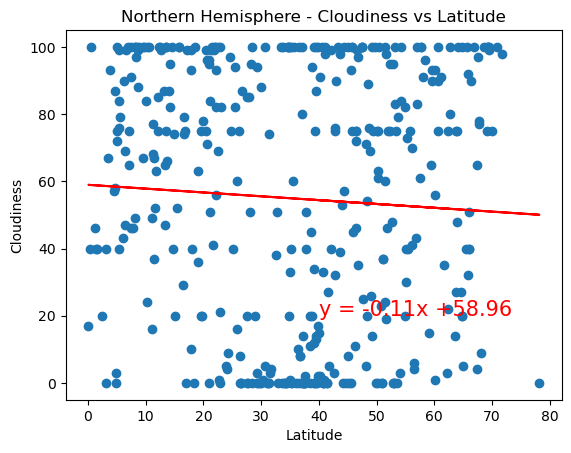

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40, 20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.000161953007367974


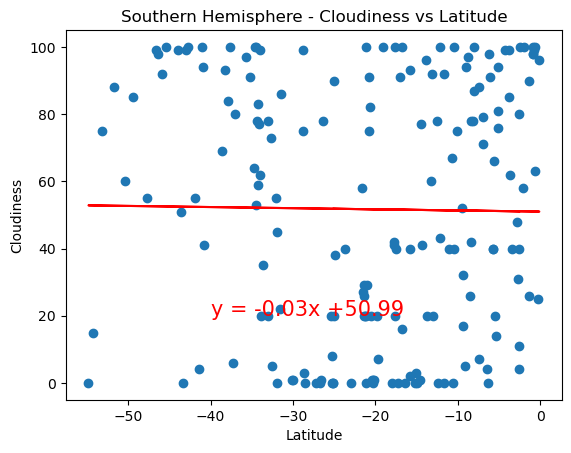

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-40, 20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both the Northern and Southern Hemisphere show negative correlations between Cloudiness vs Latitude, with the Northern Hemisphere showing a slightly steeper slope. The r-value for both data sets is very low indicating that the regression line poorly represents the relationship between Cloudiness vs Latitude for each respective hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0020428414532489805


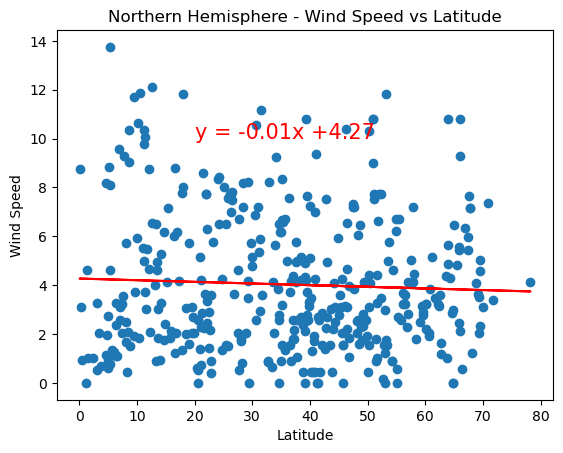

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20, 10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.041118112125077586


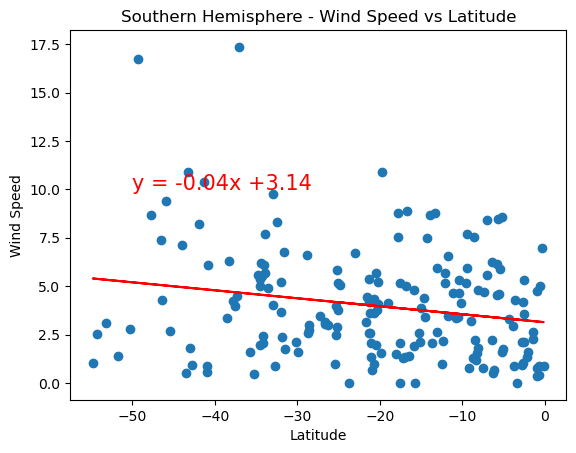

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50, 10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both the Northern and Southern Hemisphere show negative correlations between Wind Speed vs Latitude, with the Southern Hemisphere showing a slightly steeper slope. The r-value for both data sets is very low indicating that the regression line poorly represents the relationship between Cloudiness vs Latitude for each respective hemisphere (the Southern Hemisphere r-value is slightly better than that of the Northern Hemisphere).